[View in Colaboratory](https://colab.research.google.com/github/alvarogg777/colabCompression/blob/master/Compress_Lab3.ipynb)

In [3]:
from matplotlib import pyplot as plt
import numpy as np
!git clone https://github.com/alvarogg777/colabCompression.git
!mv colabCompression/*.ipynb . && rm -r colabCompression && jupyter nbconvert --to script *.ipynb && mv Compress_Lab1.txt lab1.py && mv Compress_Lab2.txt lab2.py && ls

Cloning into 'colabCompression'...
remote: Enumerating objects: 118, done.
remote: Counting objects: 100% (118/118), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 118 (delta 71), reused 3 (delta 0), pack-reused 0
Receiving objects: 100% (118/118), 2.64 MiB | 9.00 MiB/s, done.
Resolving deltas: 100% (71/71), done.
[NbConvertApp] Converting notebook Compress_Lab1.ipynb to script
[NbConvertApp] Writing 3980 bytes to Compress_Lab1.txt
[NbConvertApp] Converting notebook Compress_Lab2.ipynb to script
[NbConvertApp] Writing 4871 bytes to Compress_Lab2.txt
[NbConvertApp] Converting notebook Compress_Lab3.ipynb to script
[NbConvertApp] Writing 5614 bytes to Compress_Lab3.txt
[NbConvertApp] Converting notebook Compress_Lab4.ipynb to script
[NbConvertApp] Writing 9294 bytes to Compress_Lab4.txt
Compress_Lab1.ipynb  Compress_Lab3.txt	  lab1.py      sample_data
Compress_Lab2.ipynb  Compress_Lab4.ipynb  lab2.py
Compress_Lab3.ipynb  Compress_Lab4.txt	  lena512.bmp


In [0]:
import os
lines=[]
def removeExclamationsAndDownloads():
  for file in os.listdir():
    if(file.endswith('.py')):
      with open(file) as f:
        for line in f.readlines():
          if(line[0]!='!' and not line.startswith('files.download')):
            lines.append(line)
      os.remove(file)
      with open(file,'w') as f:
        for line in lines:
          f.write(line)
removeExclamationsAndDownloads()

(512, 512)
(256, 256)
(128, 128)
(64, 64)
(32, 32)


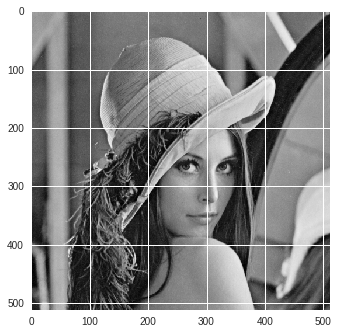

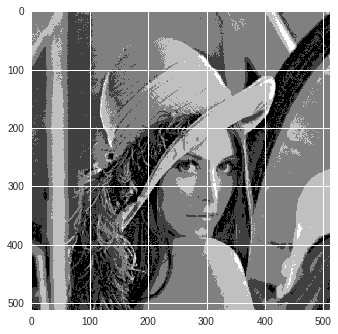

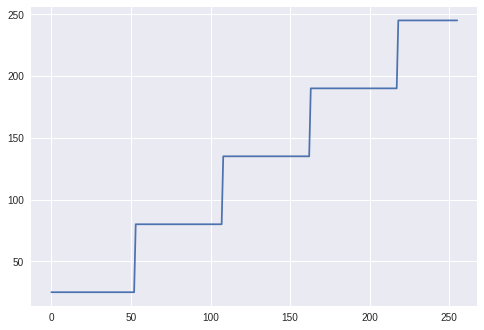

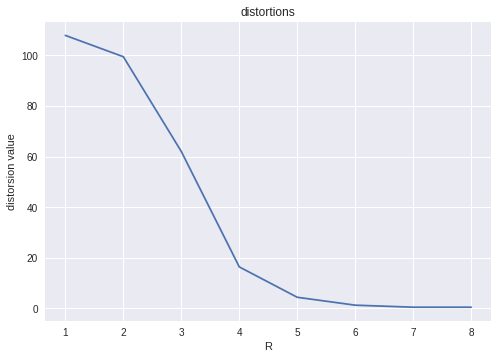

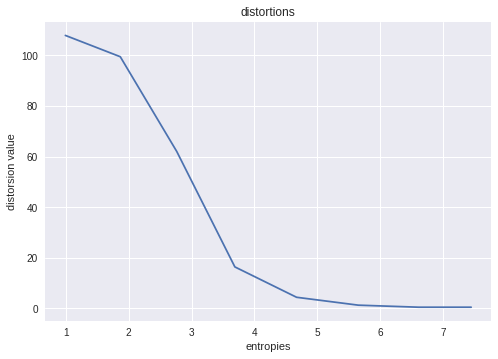

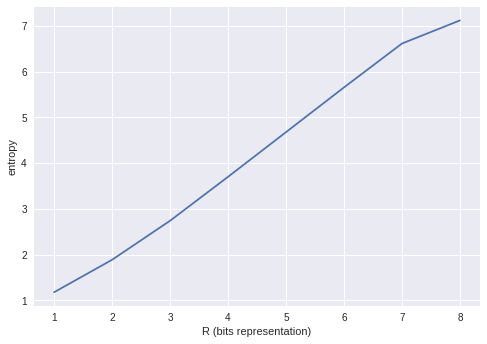

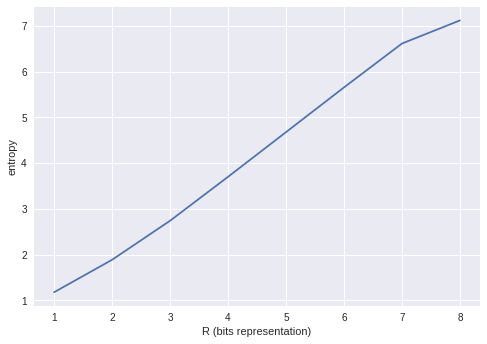

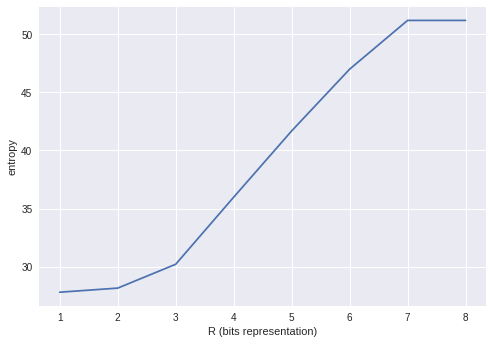

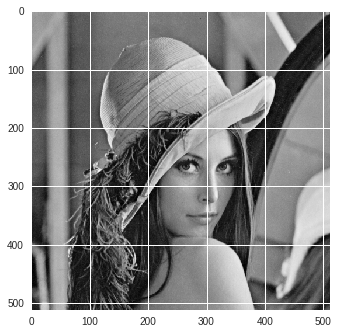

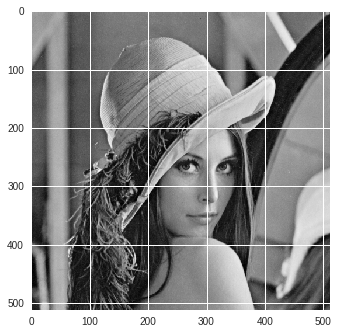

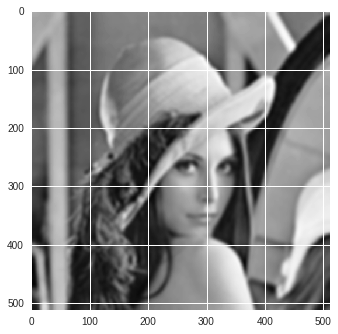

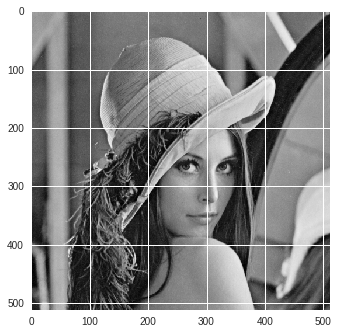

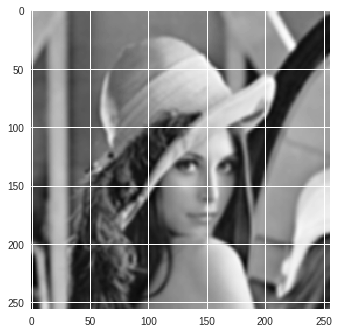

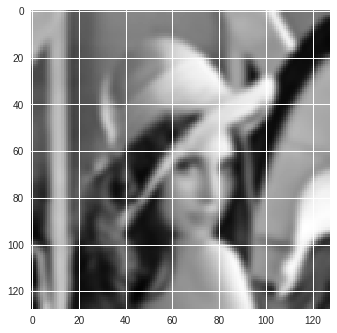

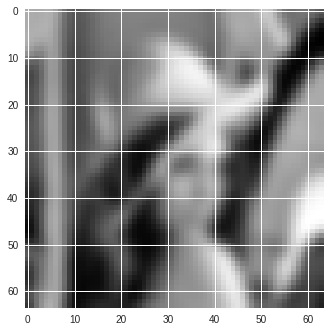

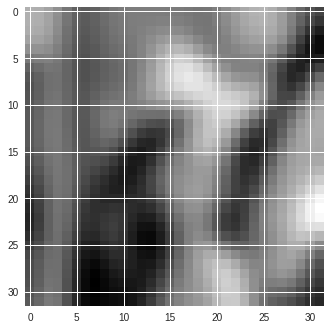

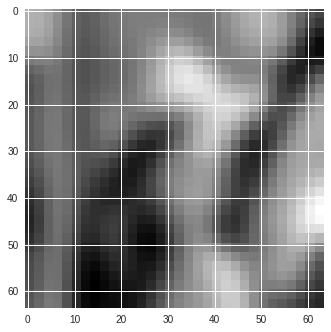

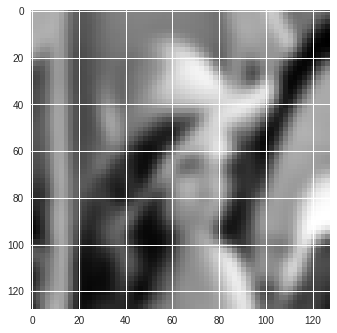

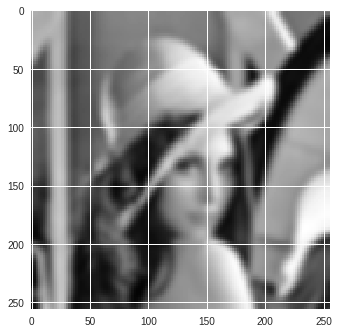

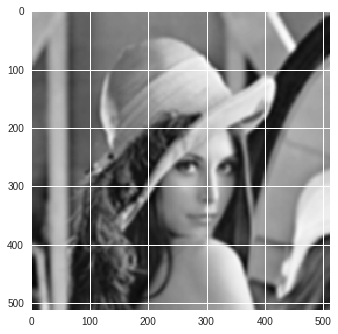

In [6]:
# import lab1, lab2
from lab1 import lena,quantizer,shannonEntropy
from lab2 import reverse_haar_multilevel,haar_multilevel

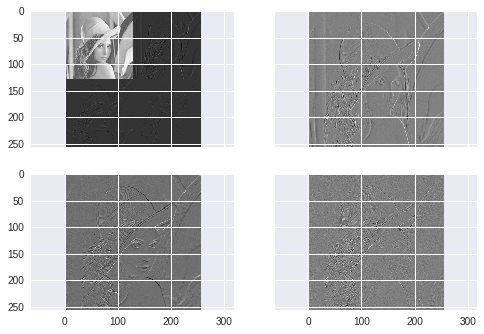

In [60]:
haarLena=haar_multilevel(lena,2)
ll2 = haarLena[0:128,0:128]
lh2 = haarLena[0:128,128:256]
hl2 = haarLena[128:256,0:128]
hh2 = haarLena[128:256,128:256]
lh1 = haarLena[0:256,256:512]
hl1 = haarLena[256:512,0:256]
hh1 = haarLena[256:512,256:512]
plt.figure()
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,frameon=False,sharex=True,sharey=True)
ax1.imshow(haarLena[0:256,0:256],cmap='gray')#([ll2+lh2],[hl2+hh2])
ax2.imshow(lh1,cmap='gray')
ax3.imshow(hl1,cmap='gray')
ax4.imshow(hh1,cmap='gray')

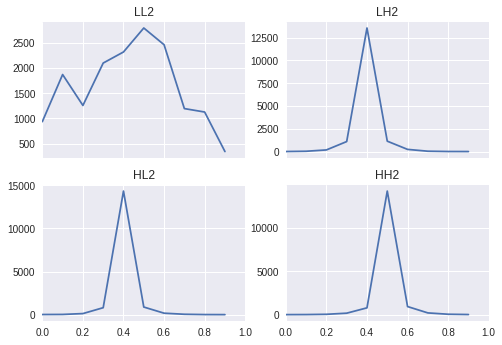

In [26]:
def normalize(input_matrix):
  scale=lambda x: (x-np.min(input_matrix))/(np.max(input_matrix)-np.min(input_matrix))
  return scale(input_matrix)
ll2_norm=normalize(ll2)
lh2_norm=normalize(lh2)
hl2_norm=normalize(hl2)
hh2_norm=normalize(hh2)
lh1_norm=normalize(lh1)
hl1_norm=normalize(hl1)
hh1_norm=normalize(hh1)

plt.figure()
f,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,frameon=False,sharex=True,sharey=False)
ax1.set_title('LL2')
ax1.set_xlim([0,1])
count,bins=np.histogram(ll2_norm)
ax1.plot(bins[:-1],count)

ax2.set_title('LH2')
ax2.set_xlim([0,1])
count,bins=np.histogram(lh2_norm)
ax2.plot(bins[:-1],count)

ax3.set_title('HL2')
ax3.set_xlim([0,1])
count,bins=np.histogram(hl2_norm)
ax3.plot(bins[:-1],count)

ax4.set_title('HH2')
ax4.set_xlim([0,1])
count,bins=np.histogram(hh2_norm)
ax4.plot(bins[:-1],count)

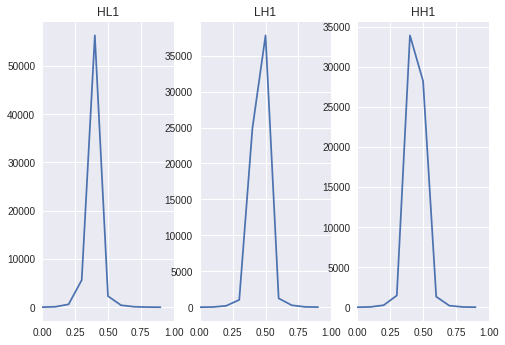

In [27]:
plt.figure()
f,((ax1,ax2,ax3))=plt.subplots(1,3,frameon=False,sharex=True,sharey=False)
ax1.set_title('HL1')
ax1.set_xlim([0,1])
count,bins=np.histogram(hl1_norm)
ax1.plot(bins[:-1],count)

ax2.set_title('LH1')
ax2.set_xlim([0,1])
count,bins=np.histogram(lh1_norm)
ax2.plot(bins[:-1],count)

ax3.set_title('HH1')
ax3.set_xlim([0,1])
count,bins=np.histogram(hh1_norm)
ax3.plot(bins[:-1],count)

So having a look at the normal distributions ranging between 0 and 1, we see that closer subbands to the low frequency subband have more values than the farther ones, and the low frequency lowbband LL2 keeps closely the original image distribution. 

A non-uniform scalar quantizer may suit more fancy for quantizing the subbands as we should have more quantization steps on values closer to the center of their distribuitions. However, since we don't have one we'll stick the linear scalar quantizater.

Thus, keeping in mind to have more quantization steps on higher dispersions, we have chosen 7 bits to quantize HL2 and LH2, 6 to HH2,  5 to HL1 and LH1, and 4 to HH1.

In [28]:
lh2.shape

(128, 128)

In [0]:
lh2_q,delta_lh2,min_lh2=quantizer(lh2_norm,7)[0]
hl2_q,delta_hl2,min_hl2=quantizer(hl2_norm,7)[0]
hh2_q,delta_hh2,min_hh2=quantizer(hh2_norm,6)[0]
lh1_q,delta_lh1,min_lh1=quantizer(lh1_norm,5)[0]
hl1_q,delta_hl1,min_hl1=quantizer(hl1_norm,5)[0]
hh1_q,delta_hh1,min_hh1=quantizer(hh1_norm,4)[0]

In [0]:
sh_ll2=shannonEntropy(ll2_norm)
sh_ll2_q=sh_ll2
sh_lh2=shannonEntropy(lh2_norm)
sh_lh2_q=shannonEntropy(lh2_q)
sh_hl2=shannonEntropy(hl2_norm)
sh_hl2_q=shannonEntropy(hl2_q)
sh_hh2=shannonEntropy(hh2_norm)
sh_hh2_q=shannonEntropy(hh2_q)

sh_lh1=shannonEntropy(lh1_norm)
sh_lh1_q=shannonEntropy(lh1_q)
sh_hl1=shannonEntropy(hl1_norm)
sh_hl1_q=shannonEntropy(hl1)
sh_hh1=shannonEntropy(hh1_norm)
sh_hh1_q=shannonEntropy(hl1_q)

In [0]:
lena_q=np.copy(haarLena)
lena_q[0:128,0:128]=ll2
lena_q[0:128,128:256]=lh2_q
lena_q[128:256,0:128]=hl2_q
lena_q[128:256,128:256]=hh2_q
lena_q[0:256,256:512]=lh1_q
lena_q[256:512,0:256]=hl1_q
lena_q[256:512,256:512]=hh1_q

In [0]:
totalE_lena=np.array([sh_ll2*np.size(ll2),sh_lh2*np.size(lh2),sh_hl2*np.size(hl2),sh_hh2*np.size(hh2),sh_lh1*np.size(lh1),sh_hl1*np.size(hl1),sh_hh1*np.size(hh1)])
totalE_lena=np.sum(totalE_lena)/np.size(lena)
# sh_lena=shannonEntropy(haarLena)#wrong
totalE_lena_q=np.array([sh_ll2_q*np.size(ll2),sh_lh2_q*np.size(lh2),sh_hl2_q*np.size(hl2),sh_hh2_q*np.size(hh2),sh_lh1*np.size(lh1),sh_hl1*np.size(hl1),sh_hh1*np.size(hh1)])
totalE_lena_q=np.sum(totalE_lena_q)/np.size(lena)
# sh_lena_q=shannonEntropy(lena_q)#wrong

In [0]:
entropies=np.transpose(np.array([sh_ll2,sh_lh2,sh_hl2,sh_hh2,sh_lh1,sh_hl1,sh_hh1,#non-quantized
                              sh_ll2_q,sh_lh2_q,sh_hl2_q,sh_hh2_q,sh_lh1,sh_hl1,sh_hh1]))#quantized

In [34]:
print('haar entropies:',entropies[:7])
print('haar quantized:',entropies[7:])#quantized
print(len(entropies))
print('total haar entropy:',totalE_lena,'\ntotal haar quantized entropy:',totalE_lena_q)

haar entropies: [11.24921645  8.13887495  7.44151933  6.87620368  5.86869705  5.39444857
  4.807082  ]
haar quantized: [11.24921645  4.19588299  3.84070036  3.023436    5.86869705  5.39444857
  4.807082  ]
14
total haar entropy: 6.124170304944394 
total haar quantized entropy: 5.411884141520513


The entropy gets reduced a half on the inner quantized haars.

In [36]:
compressRates = 8/entropies#the original image has 8 bits per symbol
print(compressRates[:7])
print(compressRates[7:])
print('compress total haar ratio:',8/totalE_lena,'\ncompress total haar quantized ratio:',8/totalE_lena_q)

[0.71116064 0.98293684 1.07504928 1.16343267 1.36316459 1.48300608
 1.66421126]
[0.71116064 1.90663086 2.08295344 2.64599615 1.36316459 1.48300608
 1.66421126]
compress total haar ratio: 1.3062994008414726 
compress total haar quantized ratio: 1.478228245616569


We can see here that the compression ratio is doubled on every subband quantized on haar wavelets compared over haars, and having 163% compression over the original unquantized haar.

In [0]:
lena_dq=np.zeros(lena.shape)
lena_dq[0:128,0:128]=lena_q[0:128,0:128]#ll2,hl2,
lena_dq[0:128,128:256]=lena_q[0:128,128:256]#dequantizer(lena_q[0:128,128:256],delta_lh2,min_lh2)
lena_dq[128:256,0:128]=lena_q[128:256,0:128]#dequantizer(lena_q[128:256,0:128],delta_hl2,min_hl2)
lena_dq[128:256,128:256]=lena_q[128:256,128:256]#dequantizer(lena_q[128:256,128:256],delta_hh2,min_hh2)
lena_dq[0:256,256:512]=lena_q[0:256,256:512]#dequantizer(lena_q[0:256,256:512],delta_lh1,min_lh1)
lena_dq[256:512,0:256]=lena_q[256:512,0:256]#dequantizer(lena_q[256:512,0:256],delta_hl1,min_hl1)
lena_dq[256:512,256:512]=lena_q[256:512,256:512]#dequantizer(lena_q[256:512,256:512],delta_hh1,min_hh1)

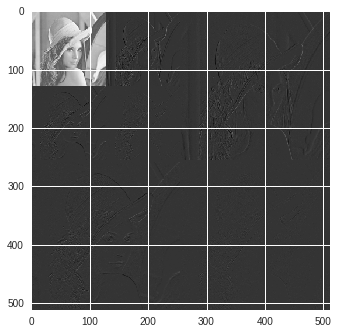

In [61]:
plt.figure()
plt.imshow(haarLena,cmap='gray')

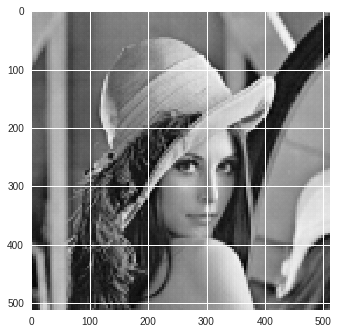

In [62]:
revHaar_dq=reverse_haar_multilevel(lena_dq,2)
revHaar=reverse_haar_multilevel(haarLena,2)
plt.figure()
plt.imshow(revHaar_dq,cmap='gray')

In [69]:
from sklearn.metrics import mean_squared_error as mse
# MSE=mse(lena,revHaar_dq)
MSE=np.mean(np.power(np.subtract(lena,revHaar_dq),2))
print(MSE)
if(MSE==0):
  PSNR=100
else:
  PSNR= 10 * np.log10((255^2)/MSE)
print('PSNR on quantized haar reverted',PSNR)
MSE=np.mean(np.power(np.subtract(lena,haarLena),2))
if(MSE<0.1):
  PSNR=100
else:
  PSNR= 10 * np.log10((255^2)/MSE)
print(MSE)
MSE=mse(lena,haarLena)
# PSNR= 10 * np.log10((255^2)/MSE)
print('PSNR on haar reverted',PSNR)

130.9884356893599
PSNR on quantized haar reverted 2.8588756550470262
0.0
PSNR on haar reverted 0.0


# Download as latex project

In [19]:
from google.colab import files
!apt install pandoc
!pip install pandoc
!git clone https://github.com/alvarogg777/colabCompression.git
!jupyter nbconvert colabCompression/Compress_Lab3.ipynb --to latex
!zip colabCompression/Compress_Lab3*
files.download('colabCompression/Compress_Lab3_files.zip')

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  liblua5.1-0 libluajit-5.1-2 libluajit-5.1-common libyaml-0-2 pandoc-data
Suggested packages:
  texlive-latex-recommended texlive-xetex texlive-luatex pandoc-citeproc
  texlive-latex-extra context wkhtmltopdf
The following NEW packages will be installed:
  liblua5.1-0 libluajit-5.1-2 libluajit-5.1-common libyaml-0-2 pandoc
  pandoc-data
0 upgraded, 6 newly installed, 0 to remove and 12 not upgraded.
Need to get 7,150 kB of archives.
After this operation, 53.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libyaml-0-2 amd64 0.1.7-2ubuntu3 [47.2 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 liblua5.1-0 amd64 5.1.5-8.1build2 [100 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libluajit-5.1-common all 2.1.0~beta3+dfsg-5.1 [44.3 kB]
Get:4 http://archive.ub

Total entropy = size(i)/N * entropy(i)

size(i)/N(lena) * entropy(i) #weight(i) * entropy(i) 